<a href="https://colab.research.google.com/github/mhprawiro/historical_tsunami/blob/main/tsunami_indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from pandas.io import gbq
from matplotlib import pyplot as plt
plt.style.use('seaborn')

import seaborn as sns


In [11]:
query = """
SELECT * FROM `bigquery-public-data.noaa_tsunami.historical_runups` 

"""

df_all_country = gbq.read_gbq(query=query,dialect='standard',project_id='irgeospatial')

In [12]:
# filter data Indonesia
df_indonesia =  df_all_country.loc[df_all_country['country']== 'INDONESIA']
df_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2591 entries, 55 to 28077
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            2591 non-null   Int64  
 1   tsevent_id                    2591 non-null   Int64  
 2   year                          2591 non-null   Int64  
 3   month                         2586 non-null   Int64  
 4   day                           2580 non-null   Int64  
 5   timestamp                     2580 non-null   object 
 6   doubtful                      10 non-null     object 
 7   country                       2591 non-null   object 
 8   state                         2568 non-null   object 
 9   location_name                 2591 non-null   object 
 10  latitude                      2541 non-null   float64
 11  longitude                     2541 non-null   float64
 12  region_code                   2591 non-null   Int64  
 13  d

**Null Check**


In [13]:
df_indonesia.isnull().sum()

id                                 0
tsevent_id                         0
year                               0
month                              5
day                               11
timestamp                         11
doubtful                        2581
country                            0
state                             23
location_name                      0
latitude                          50
longitude                         50
region_code                        0
distance_from_source              50
arr_day                         2550
arr_hour                        2550
arr_min                         2550
travel_time_hours               2551
travel_time_minutes             2544
water_ht                         381
horizontal_inundation           1786
type_measurement_id               17
period                          2561
first_motion                    2569
deaths                          2475
deaths_description              2436
injuries                        2564
i

**Data completeness**


---




*   Only several attributes has no **null** data.
*   Considering to drop lot of columns since there is lot of rows with null value.










In [14]:
pd.set_option("display.max_columns", None)
df_indonesia.head()

,id,tsevent_id,year,month,day,timestamp,doubtful,country,state,location_name,latitude,longitude,region_code,distance_from_source,arr_day,arr_hour,arr_min,travel_time_hours,travel_time_minutes,water_ht,horizontal_inundation,type_measurement_id,period,first_motion,deaths,deaths_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_damaged,houses_damaged_description,houses_destroyed,houses_destroyed_description
55,25417,1456,1918,8,15,1918-08-15 12:18:12,None,INDONESIA,NORTH SULAWESI,"MANADO, SULAWESI ISLAND",1.4950,124.8400,83,490,15,21,15,9,7,1.00,NaN,1,NaN,None,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
56,25418,1456,1918,8,15,1918-08-15 12:18:12,None,INDONESIA,CENTRAL SULAWESI,"BUOL, SULAWESI ISLAND",1.1667,121.4333,83,512,15,21,15,9,7,NaN,NaN,1,NaN,None,<NA>,<NA>,<NA>,<NA>,NaN,1,<NA>,<NA>,<NA>,<NA>
57,1763,1456,1918,8,15,1918-08-15 12:18:12,None,INDONESIA,CENTRAL SULAWESI,"PALELEH, SULAWESI ISLAND",1.0481,121.9514,83,509,15,21,0,8,52,NaN,NaN,1,NaN,None,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
58,10030,1244,1897,9,21,1897-09-21 05:12:00,None,INDONESIA,NORTH SULAWESI,SIAU ISLAND,2.8100,125.4100,83,519,21,8,30,1,30,NaN,NaN,1,NaN,None,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
171,17182,4763,2010,4,6,2010-04-06 22:15:01,None,INDONESIA,NORTH SUMATRA,"SIBOLGA, SUMATRA",1.7290,98.7850,60,206,6,23,33,1,18,0.19,NaN,2,33.0,R,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


**Drop Null and Unusefull Columns**

In [15]:
#original
print("shape before drop null :", df_indonesia.shape)
      
#drop null on lat long
df_indonesia.dropna()
df_indonesia.dropna(axis = 0, subset = ['latitude','longitude', 'distance_from_source','water_ht'], inplace=True)
      
print("shape after drop null :", df_indonesia.shape)

shape before drop null : (2591, 34)
shape after drop null : (2186, 34)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
df_indonesia_useful = df_indonesia[['year', 'month', 'day', 'timestamp', 'latitude','longitude', 'distance_from_source','water_ht', 'state' ,	
                                        'location_name']]

In [19]:
df_indonesia_useful['state'].value_counts()

ACEH                   527
WEST SUMATRA           348
CENTRAL SULAWESI       314
BANTEN                 245
LAMPUNG                147
EAST JAVA              103
EAST NUSA TENGGARA      89
WEST JAVA               78
PAPUA                   59
NORTH SUMATRA           56
MALUKU                  44
CENTRAL JAVA            40
BENGKULU                34
BALI                    16
NORTH SULAWESI          16
NORTH MALUKU            13
WEST PAPUA              11
YOGYAKARTA              10
WEST NUSA TENGGARA       8
WESTJAVA                 6
SOUTH SULAWESI           5
SOUTH EAST SULAWESI      3
JAKARTA                  2
SUNDA STRAIT             2
SOUTH KALIMANTAN         2
WEST SULAWESI            2
SUMATRA                  1
WEST KALIMANTAN          1
Name: state, dtype: int64

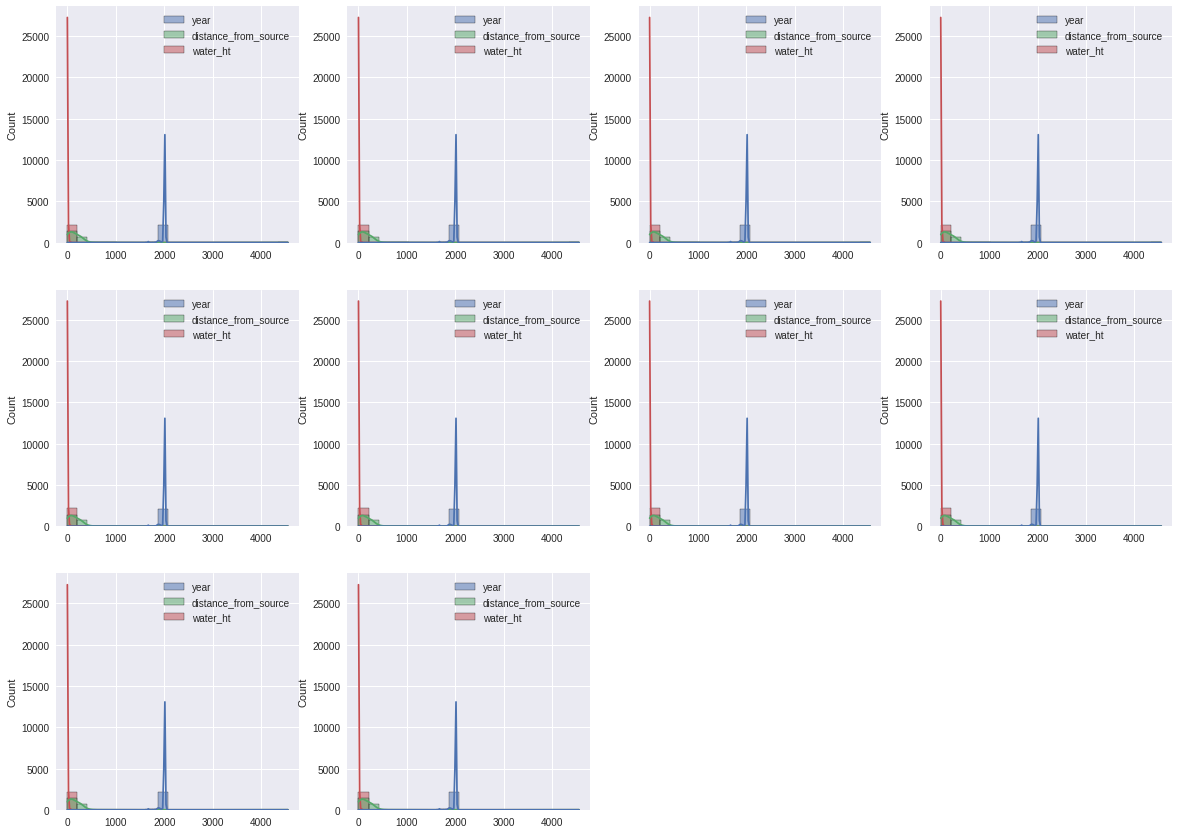

In [28]:
plt.figure(figsize=(20,20))

x =1
for col in df_indonesia_useful:
  ax = plt.subplot(4,4,x)
  sns.histplot(df_indonesia_useful[['year','distance_from_source','water_ht']], kde = True)
  x += 1

plt.show()
